# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Пятая лабораторная работа </center>
# <center> Частотный конвертер </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fft
import librosa
import IPython.display as ipd
import librosa.display

# Запретим numpy выполнять деление на 0
np.seterr(divide='raise', invalid='raise')
%matplotlib inline

In [3]:
# Функция отрисовки аудио сигнала. 
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)
    plt.show()

Входные значения

In [4]:
N1 = 2000  # Начальная частота дискретизации
N2 = 1000  # Желаемая частота дискретизации

n = np.minimum(N1, N2)
N = N1*N2

# x = data

arr = np.arange(N1) # Для примера
                    # генерируем сигнал длительностью 1 секунда с частотой дискретизации N1

x = 45*np.cos((2*np.pi/425)*arr) - 50*np.sin((2*np.pi/100)*arr)

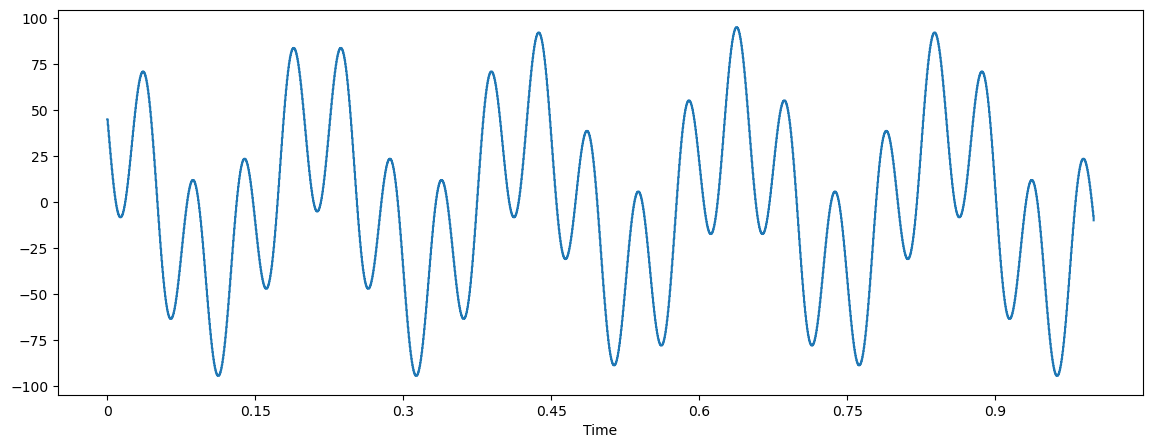

In [5]:
### Исходный сигнал ###
draw_waveform(x, N1)

Растяжение исходного сигнала

In [6]:
x_new = np.zeros(N)

for ind in range(N):
    if ind % N2 == 0:
        x_new[ind] = x[ind//N2]

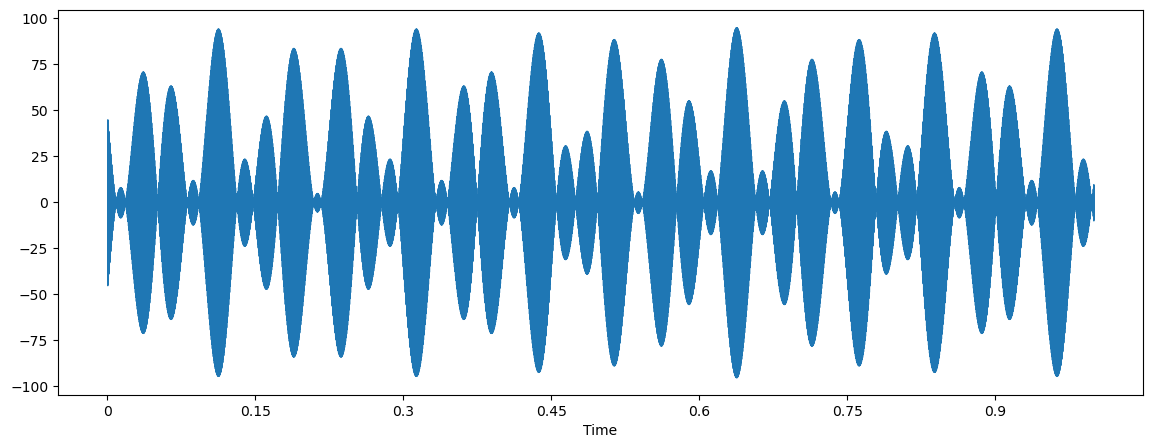

In [7]:
### Сигнал после растяжения ###
draw_waveform(x_new, N)

Фильтрация

In [8]:
h = np.zeros(N)

for ind in range(N-1):
    if ind <= n-1:
        h[ind] = N1

In [9]:
y = scipy.fft.ifft(scipy.fft.fft(x_new) * h)

Прореживание

In [10]:
y = y[np.arange(0, N) % N1 == 0]

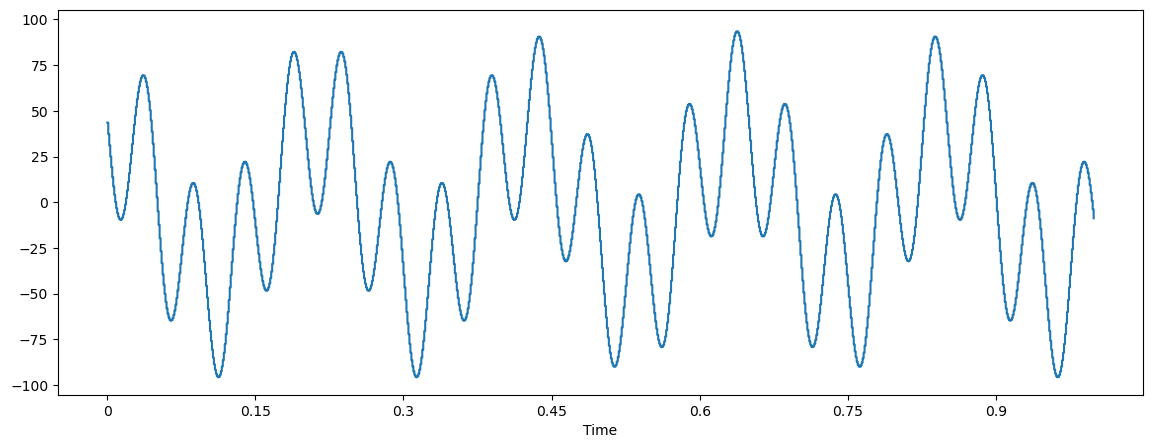

In [11]:
### Получившийся сигнал ###
draw_waveform(y.real, N2)

Графики со сравнением

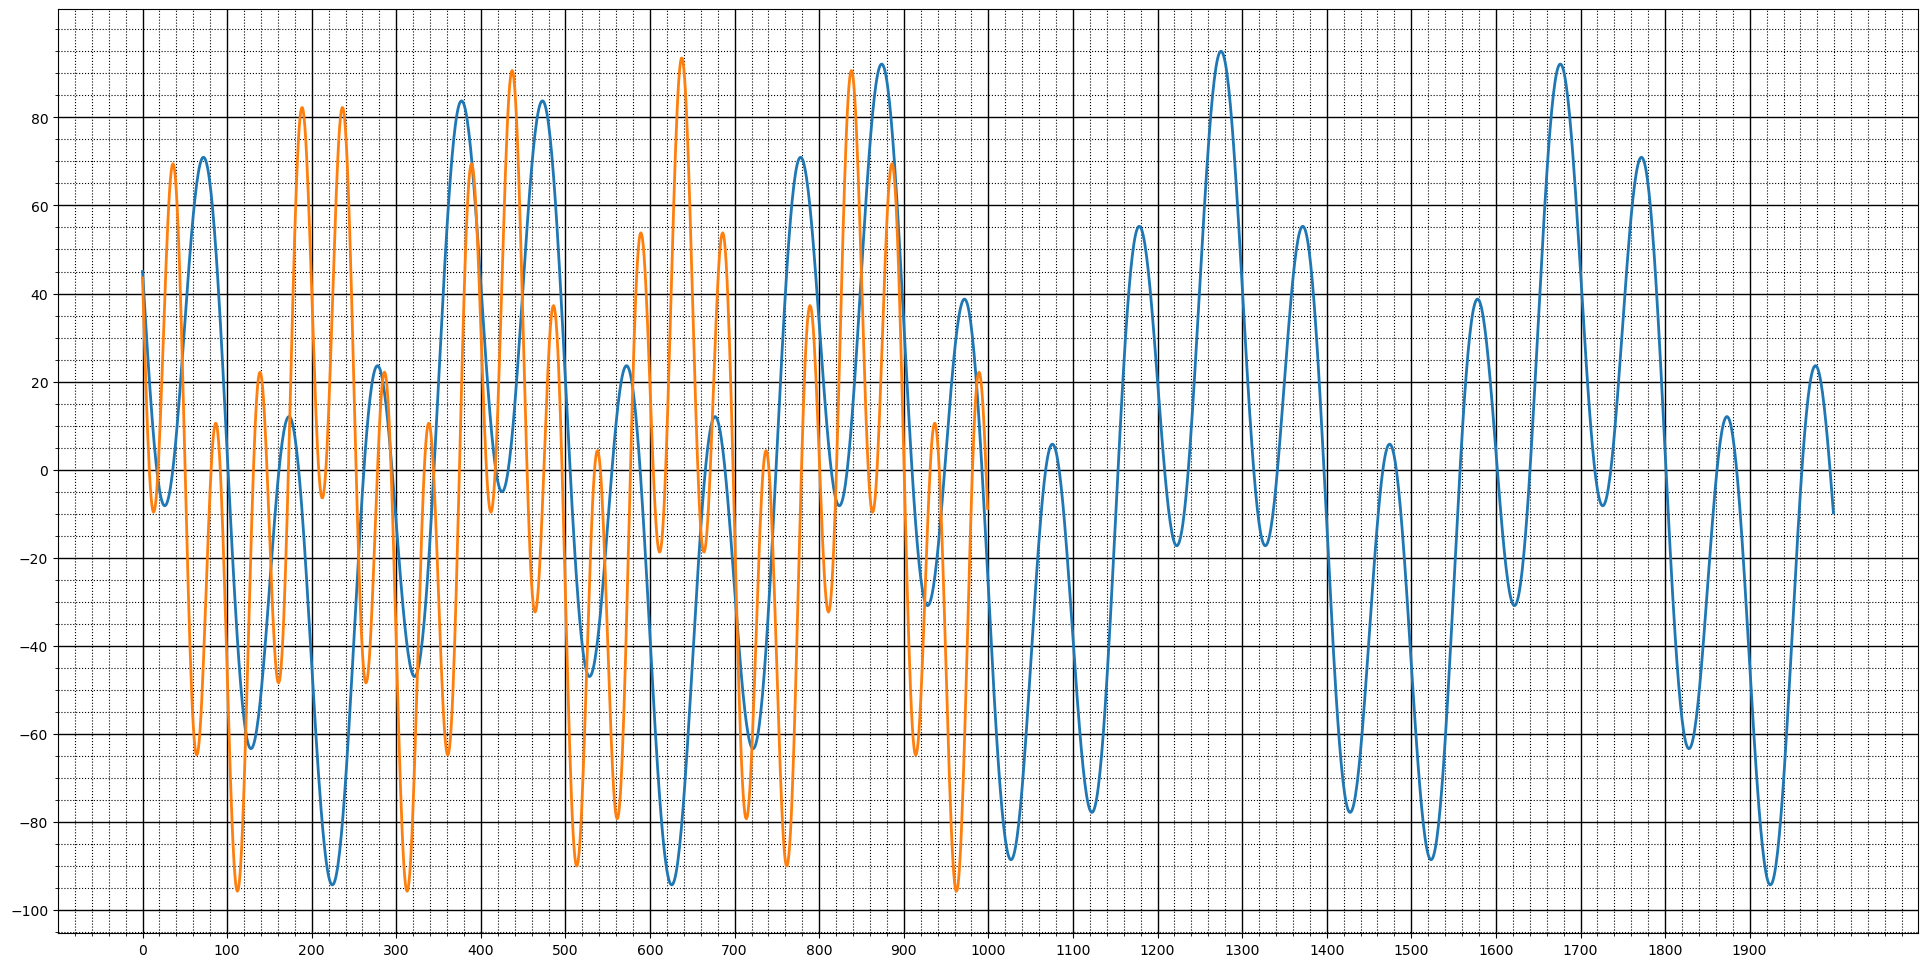

In [12]:
temp = y
y = y.real

# Графики сигналов на разлинованном фоне

plt.figure(figsize=(24, 12))
plt.plot(x, linewidth=2)
plt.plot(y, linewidth=2)
plt.minorticks_on()
plt.xticks(np.arange(0, 2000, step=100))
plt.yticks(np.arange((y.min().round())//10*10, 
                        (y.max().round())//10*10+10, step=20))
plt.grid(which='major',
    color = 'k', 
    linewidth = 1)
plt.grid(which='minor', 
    color = 'k', 
    linestyle = ':')
plt.show()

y = temp

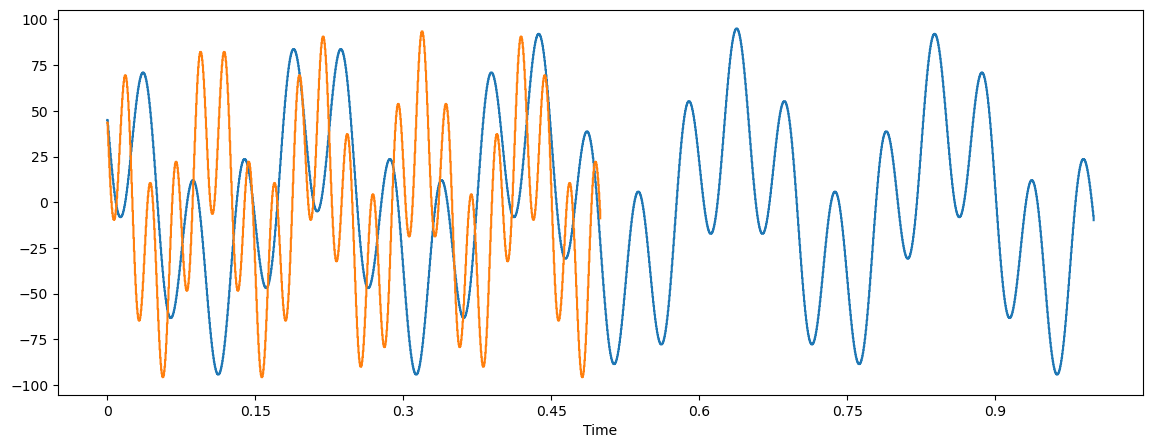

In [13]:
# Графики двух осциллограмм (оба сигнала приведены к частоте дискретизации N1)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=N1)
librosa.display.waveshow(y.real, sr=N1)
plt.show()

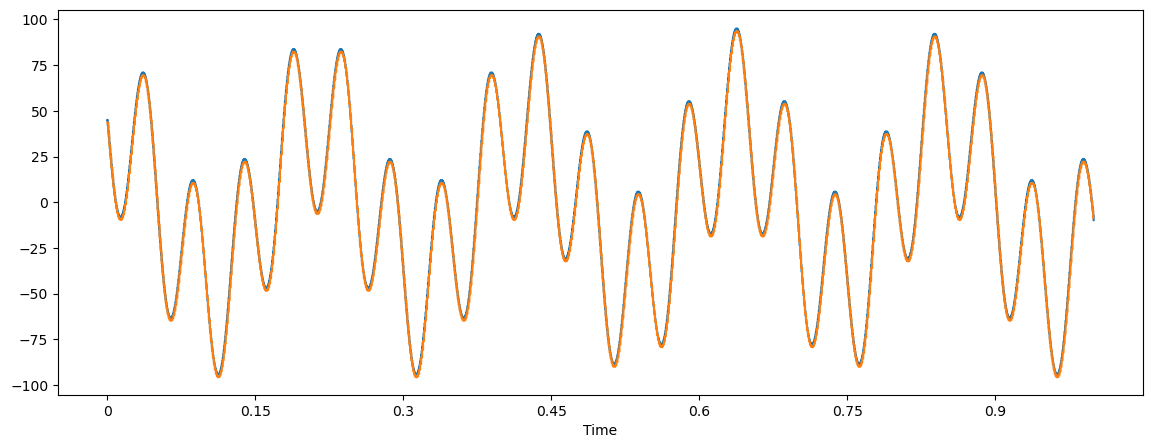

In [14]:
# Графики двух осциллограмм (для первого сигнала частота дискретизации N1, для второго N2)
# Можно увидеть что они буквально повторяют друг друга (т.е. преобразование прошло успешно)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=N1)
librosa.display.waveshow(y.real, sr=N2)
plt.show()